In [111]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [112]:
# read csv using Pandas
df_OG = pd.read_csv('train.csv')
df_x=df_OG.drop('label',axis=1)
df_y=df_OG['label']

In [113]:
labels = df_OG.iloc[:, 0]  # Assuming first column has the labels
print(labels.value_counts())  # Check distribution of digits

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [114]:
df_x.shape # 28 times 28 = 784

(42000, 784)

In [115]:
x_no_flat=df_x.values.reshape(-1,28,28,1)

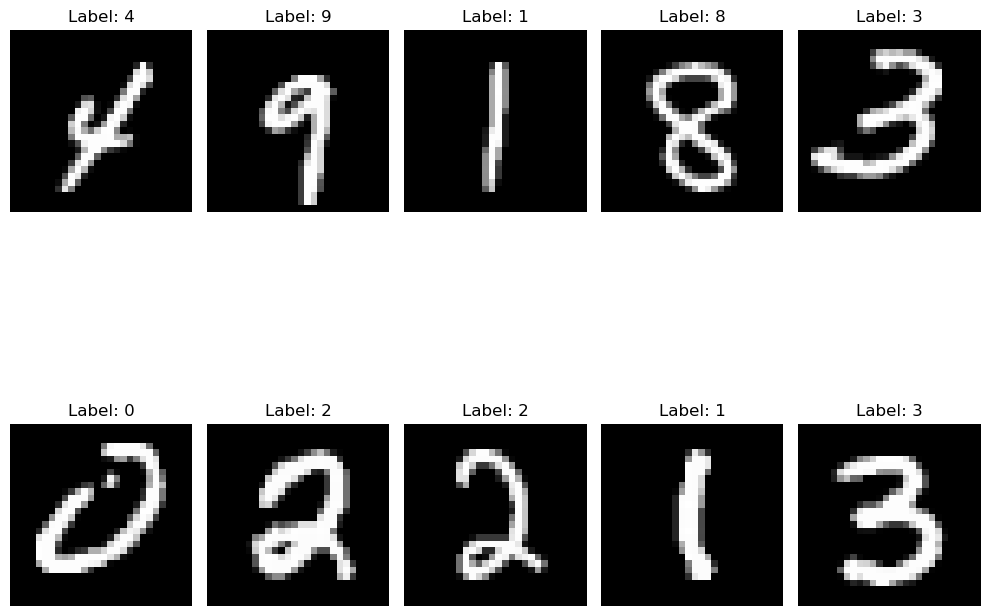

In [116]:
num_images = 10  # Number of images to display
indices = np.random.choice(df_OG.shape[0], num_images, replace=False)
images = x_no_flat[indices]
labels = df_y[indices]

# Create a grid of images
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for ax, img, label in zip(axes.flatten(), images, labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()

In [117]:
####################################################
####################################################
def weights_incialization(units, type_inicilization):
    # inicializar listas vazias:
    Weights = [] 
    Biases = []

    
    if type_inicilization == 'random':
        for i in range(len(units)-1):
            w = 0.1 * np.random.randn(units[i], units[i+1])
            b = 0.1 * np.random.randn(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)

    elif type_inicilization == 'normal_distribution':
        mu, sigma = 0.1, 0.1**2
        for i in range(len(units)-1):
            w = np.random.normal(mu, sigma, size=(units[i], units[i+1]))
            b = np.random.normal(mu, sigma, size=(units[i+1],1)).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)

    elif type_inicilization == 'zeros':
        for i in range(len(units)-1):
            w = np.zeros((units[i], units[i+1]))
            b = np.zeros(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)      
    
    else:
        for i in range(len(units)-1):
            w = 0.1 * np.ones((units[i], units[i+1]))
            b = 0.1 * np.ones(units[i+1]).reshape(-1,1)
            # dá append nas listas:
            Weights.append(w) 
            Biases.append(b)        
        
    return Weights, Biases
####################################################
####################################################





####################################################
####################################################
def activation_function(z):
    # Activation function: g(h)=ReLU(h)
    #h = z/2 + np.abs(z)/2
    h = np.maximum(0,z)
    #h = np.clip(z, 0, None)
    
    # Activation function: g(h)=tanh(h) [funcao de ativacao - tangente hiperbolica]
    #h = np.tanh(z) # tanh
    return h
####################################################
####################################################

####################################################
####################################################
def diff_activation_function(z): # com base no valor de h
    # Derivative of the g(z)=ReLU(z) function
    '''
    g_diff = np.zeros((h_i.shape[0],1))
    for k in range(h_i.shape[0]):
        g_diff[k] = 1 if h_i[k]>0 else 0
    '''
    g_diff = z
    g_diff[g_diff>0] = 1
    g_diff[g_diff<=0] = 0
    
    # Derivada da funçao de ativação (da tanh) 
    #g_diff = 1 - (h)**2
    
    
    return g_diff
####################################################
####################################################








####################################################
####################################################
def forward(x, Weights, Biases):

    Hiddens = []
    Z = []


    if len(x.shape) == 1:
        x = x.reshape(784,-1)
    
    else:
        nl , nc = x.shape

    #Input Layer:
    h_l_min_1 = x

    #Input Layer:
    if h_l_min_1.shape[0]!=784:
        h_l_min_1 = h_l_min_1.T



    #h_l_min_1 = x.reshape(784,-1) # entra a observacao, e so isso (NAO FUNCIONA, PODE ESTRAGAR OS DADOS)
    
    for l in range(len(Weights)):
        # Pre-activation:
        z_l = Weights[l].T@h_l_min_1 + Biases[l]

        # Activation:
        if l == len(Weights)-1: # Output layer
            h_l = softmax(z_l)
        else:
            #funcao de ativacao: ReLu
            h_l = activation_function(z_l)

        Hiddens.append(h_l)
        Z.append(z_l)

        h_l_min_1 = h_l
    
    #z_out = Z[-1]          
    return Z , Hiddens
####################################################
####################################################



####################################################
####################################################
def softmax(z):
    #Input Layer:
    if z.shape[0]!=10:
        z = z.T
   #z = z.reshape(10,-1)

    m = z.max()
    soft = np.exp(z-m)/np.sum(np.exp(z-m),axis=0) # column by column
    return soft
####################################################
####################################################




####################################################
####################################################
def backward( x, y_one_hot, Z, Hiddens, Weights, Biases):
    #x = x.reshape(784,-1)
    if x.shape[0]!=784:
        x = x.T

    if len(x.shape) == 1:
        nc = 1 # number of columns
        y_one_hot = y_one_hot.reshape(10,-1)
        x = x.reshape(784,-1)
    
    else:
        nl , nc = x.shape


    # inicializar listas vazias:
    grad_Weights_of_Loss = []
    grad_Biases_of_Loss = []



    for l in reversed(range(len(Z))): # -> Output Layer:

        if l == len(Z)-1: # Output layer

            grad_zl_of_Loss = Hiddens[l] - y_one_hot
            

            #This matrix multiplication immediately guarantees the correct dimension of the vector:
            grad_Weights_of_Loss.append(1/nc * Hiddens[l-1]@grad_zl_of_Loss.T)
            #Here we have to add all the components (columns) of the matrix:
            grad_Biases_of_Loss.append(1/nc * np.sum(grad_zl_of_Loss,axis=1))
            grad_Biases_of_Loss[-1] = grad_Biases_of_Loss[-1].reshape(-1,1)
        
        elif l == 0: # -> Input Layer
            grad_zlp1_of_Loss = grad_zl_of_Loss #lp1 (l 'plus' 1) = l+1
            grad_hl_of_Loss = Weights[l+1]@grad_zlp1_of_Loss
            
            g_diff= diff_activation_function(Z[l])
            grad_zl_of_Loss = grad_hl_of_Loss * g_diff

            #This matrix multiplication immediately guarantees the correct dimension of the vector:
            grad_Weights_of_Loss.append(1/nc * x@grad_zl_of_Loss.T)

            #Here we have to add all the components (columns) of the matrix:
            grad_Biases_of_Loss.append(1/nc * np.sum(grad_zl_of_Loss,axis=1))
            grad_Biases_of_Loss[-1] = grad_Biases_of_Loss[-1].reshape(-1,1)
    
        else: # -> Hidden Layer's:
            grad_zlp1_of_Loss = grad_zl_of_Loss #lp1 (l 'plus' 1) = l+1
            grad_hl_of_Loss = Weights[l+1]@grad_zlp1_of_Loss
            
            g_diff= diff_activation_function(Z[l])
            grad_zl_of_Loss = grad_hl_of_Loss * g_diff

            #This matrix multiplication immediately guarantees the correct dimension of the vector:
            grad_Weights_of_Loss.append(1/nc * Hiddens[l-1]@grad_zl_of_Loss.T)
            #Here we have to add all the components (columns) of the matrix:
            grad_Biases_of_Loss.append(1/nc * np.sum(grad_zl_of_Loss,axis=1))
            grad_Biases_of_Loss[-1] = grad_Biases_of_Loss[-1].reshape(-1,1)


    grad_Weights_of_Loss.reverse()
    grad_Biases_of_Loss.reverse()      

    return grad_Weights_of_Loss, grad_Biases_of_Loss   
####################################################
####################################################




####################################################
####################################################
def update_parameters(Weights, Biases, grad_Weights, grad_Biases, eta):
    num_layers = len(Weights)
    for i in range(num_layers):
        Weights[i] -= eta*grad_Weights[i]
        Biases[i] -= eta*grad_Biases[i]
####################################################
####################################################



# One-hot Enconding: Encode labels as one-hot vectors.
####################################################
####################################################
def one_hot(y):
    one_hot = np.zeros((y.size,10))
    one_hot[np.arange(y.size),y]=1
    one_hot = one_hot.T

    return one_hot
####################################################
####################################################






# Negative Log-Likelihood (Cross-Entropy)
####################################################
####################################################
def compute_loss(y_hat, y_one_hot):

    if len(y_hat.shape) == 1:
        nc = 1 # number of columns
        y_one_hot = y_one_hot.reshape(10,-1)
        y_hat = y_hat.reshape(10,-1)
    
    #y_hat = y_hat.reshape(10,-1)
    if y_hat.shape[0]!=10:
        y_hat = y_hat.T
    #y_one_hot = y_one_hot.reshape(10,-1)
    if y_one_hot.shape[0]!=10:
        y_one_hot = y_one_hot.T
    
    Loss = np.sum(-y_one_hot.T@(np.log(y_hat)))
    return Loss 
####################################################
####################################################




####################################################
####################################################
def predict(x, Weights, Biases):

    Z , Hiddens = forward(x, Weights, Biases)
    y_hat = np.argmax(Hiddens[-1],axis=0)
        
    return y_hat
####################################################
####################################################





####################################################
####################################################
def accuracy(y, y_hat):

    n_correct = (y == y_hat).sum()
    n_possible = len(y)
    
    accuracy = n_correct / n_possible
    
    return accuracy
####################################################
####################################################




########################################################################################################
########################################################################################################
def train_epoch(x, y_one_hot, Weights, Biases, learning_rate):
    
    '''
    grad_Weights = Weights
    grad_Biases = Biases
    for gw,gb in zip(grad_Weights,grad_Biases):
        gw.fill(0)
        gb.fill(0)
    '''

    '''
    # inicializar listas vazias:
    units = [784, 10, 10]
    grad_Weights = [] 
    grad_Biases = []
    for i in range(len(units)-1):
        gw = np.zeros((units[i], units[i+1]))
        gb = np.zeros(units[i+1]).reshape(-1,1)
        # dá append nas listas:
        grad_Weights.append(gw) 
        grad_Biases.append(gb)
    
    Loss = 0

    for x_i, y_1hot_i in zip(x, y_one_hot.T): # Corre todas as observações 

        #x_i = x_i.reshape(784,-1)
        if x_i.shape[0]!=784:
            x_i = x_i.T
        #y_1hot_i = y_1hot_i.reshape(10,-1)
        if y_1hot_i.shape[0]!=10:
            y_1hot_i = y_1hot_i.T
        #print(y_1hot_i.shape)
        Z , Hiddens = forward(x_i,Weights, Biases)
        grad_W, grad_B = backward( x_i, y_1hot_i, Z, Hiddens, Weights, Biases)
        grad_Weights +=  grad_W
        grad_Biases += grad_B
    
    m = len(x)
    print(m)
    print(x.shape)


    for gw,gb in zip(grad_Weights,grad_Biases):
        gw = 1/m * gw
        gb = 1/m * gb
    #grad_Weights =  1/m * grad_Weights
    #grad_Biases = 1/m * grad_Biases

    update_parameters(Weights, Biases, grad_Weights, grad_Biases, learning_rate)
    Z , Hiddens = forward(x,Weights, Biases)
    Loss = compute_loss(Hiddens[-1], y_one_hot)   
    
    '''
    ############################################
    '''
    Loss = 0
    if x.shape[0]!=784:
        x = x.T
    if y_one_hot.shape[0]!=10:
        y_one_hot = y_one_hot.T

    Z , Hiddens = forward(x,Weights, Biases)
    grad_Weights, grad_Biases = backward( x, y_one_hot, Z, Hiddens, Weights, Biases)
    update_parameters(Weights, Biases, grad_Weights, grad_Biases, learning_rate)
    Loss = compute_loss(Hiddens[-1], y_one_hot)
    '''
    ############################################

    Loss = 0
    for x_i, y_1hot_i in zip(x, y_one_hot.T): # Corre todas as observações 

        #x_i = x_i.reshape(784,-1)
        if x_i.shape[0]!=784:
            x_i = x_i.T
        #y_1hot_i = y_1hot_i.reshape(10,-1)
        if y_1hot_i.shape[0]!=10:
            y_1hot_i = y_1hot_i.T

        Z , Hiddens = forward(x_i,Weights, Biases)
        grad_Weights, grad_Biases = backward( x_i, y_1hot_i, Z, Hiddens, Weights, Biases)
        update_parameters(Weights, Biases, grad_Weights, grad_Biases, learning_rate)
        
        loss = compute_loss(Hiddens[-1], y_1hot_i)
        Loss += loss

    return Loss
########################################################################################################
########################################################################################################







In [118]:
x = df_x.to_numpy()
x = x/255 # normalize the data
y = df_y.to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

y_train_one_hot = one_hot(y_train)
y_test_one_hot = one_hot(y_test)

# NN ARCHITECTURE:
# -> The first 'units' entry is the input size: 784
# -> The entries in the middle of 'units' are the size of the hidden layers: 200
# -> The last entry of 'units' the is output size: 10
units = [784, 200, 10]


# Initialize all weights and biases randomly.
type_inicialization = 'normal_distribution'
#type_inicialization = 'random'
#type_inicialization = 'zeros'
Weights , Biases = weights_incialization(units, type_inicialization)

# Learning rate
learning_rate = 0.01 

EPOCHS = 20

train_accuracies = []
test_accuracies = []
Train_Loss = []
Test_Loss = []

for E in range(EPOCHS):
    print("-> EPOCH:" ,E+1)
    
    # -> Treinar com os dados do train:
    train_loss = train_epoch(x_train, y_train_one_hot, Weights, Biases, learning_rate)
    print("Train Loss: ", train_loss)
    Train_Loss.append(train_loss)
   
    Z , Hiddens = forward(x_train, Weights, Biases)
    y_train_hat = np.argmax(Hiddens[-1],axis=0)
    train_acc = accuracy(y_train, y_train_hat)
    print("Train accuracy = ", train_acc)
    train_accuracies.append(train_acc) 

    # -> Test
    Z , Hiddens = forward(x_test, Weights, Biases)
    y_test_hat = np.argmax(Hiddens[-1],axis=0)
    test_loss = compute_loss(Hiddens[-1], y_test_one_hot)
    Test_Loss.append(test_loss)
    
    test_acc = accuracy(y_test, y_test_hat)
    print("Test Loss: ", test_loss)
    print("Test accuracy = ", test_acc)
    test_accuracies.append(test_acc) 


-> EPOCH: 1


/var/folders/dn/hdz11q8j6s948t1shyxvbckm0000gn/T/ipykernel_1778/852903823.py:276: RuntimeWarning: divide by zero encountered in log
  Loss = np.sum(-y_one_hot.T@(np.log(y_hat)))
/var/folders/dn/hdz11q8j6s948t1shyxvbckm0000gn/T/ipykernel_1778/852903823.py:276: RuntimeWarning: invalid value encountered in matmul
  Loss = np.sum(-y_one_hot.T@(np.log(y_hat)))


Train Loss:  nan
Train accuracy =  0.9437202380952381
Test Loss:  699194633.9643463
Test accuracy =  0.9369047619047619
-> EPOCH: 2
Train Loss:  5450.390566445355
Train accuracy =  0.9673809523809523
Test Loss:  786477336.5065614
Test accuracy =  0.9538095238095238
-> EPOCH: 3
Train Loss:  3747.8469610791817
Train accuracy =  0.9735714285714285
Test Loss:  877123389.8649175
Test accuracy =  0.9583333333333334
-> EPOCH: 4
Train Loss:  2762.8148234636346
Train accuracy =  0.9782440476190476
Test Loss:  955134857.2400533
Test accuracy =  0.9601190476190476
-> EPOCH: 5
Train Loss:  2142.855314656755
Train accuracy =  0.9838095238095238
Test Loss:  1047670936.7838576
Test accuracy =  0.9655952380952381
-> EPOCH: 6
Train Loss:  1571.0685191483751
Train accuracy =  0.986845238095238
Test Loss:  1114179537.7887206
Test accuracy =  0.9657142857142857
-> EPOCH: 7
Train Loss:  1195.042226356665
Train accuracy =  0.9897321428571428
Test Loss:  1188000917.2157192
Test accuracy =  0.9670238095238095

In [119]:
len(train_accuracies)

20

<function matplotlib.pyplot.show(close=None, block=None)>

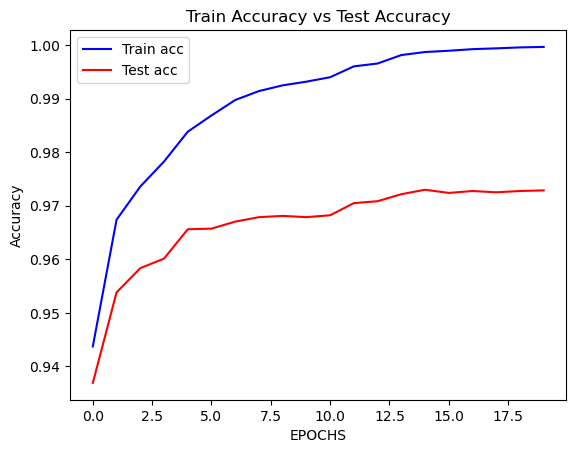

In [120]:
plt.figure()
plt.plot(range(EPOCHS), train_accuracies, 'b-', label='Train acc')
plt.plot(range(EPOCHS), test_accuracies, 'r-', label='Test acc')
plt.ylabel('Accuracy')
plt.xlabel('EPOCHS')
plt.title('Train Accuracy vs Test Accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

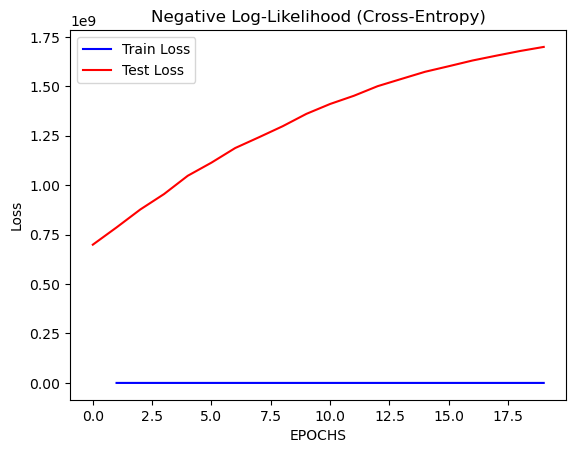

In [121]:
plt.figure()
plt.plot(range(EPOCHS), Train_Loss, 'b-', label='Train Loss')
plt.plot(range(EPOCHS), Test_Loss, 'r-', label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCHS')
plt.title('Negative Log-Likelihood (Cross-Entropy)')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

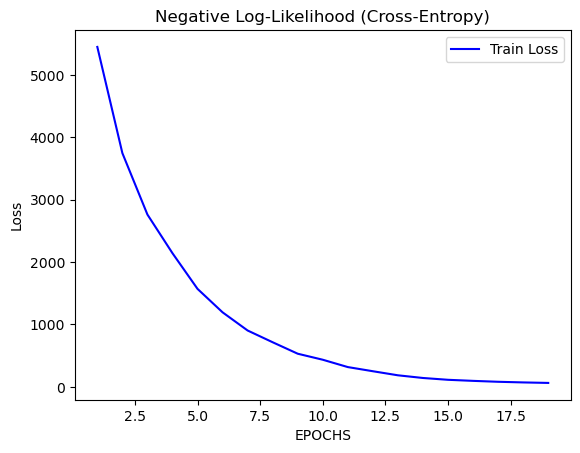

In [122]:
plt.figure()
plt.plot(range(EPOCHS), Train_Loss, 'b-', label='Train Loss')
plt.ylabel('Loss')
plt.xlabel('EPOCHS')
plt.title('Negative Log-Likelihood (Cross-Entropy)')
plt.legend()
plt.show

In [123]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[1,2],
              [3,4],
              [5,6]])



In [124]:
tensor_result = np.einsum('ij,kj->jik', A, B)




In [125]:
np.sum(np.einsum('ij,kj->jik', A, B),axis=0)

array([[ 5, 11, 17],
       [11, 25, 39]])

In [ ]:
A = np.array([[1,2],
              [3,4]
              [5,6]])

B = np.array([[1,2],
              [3,4],
              [5,6]])